# Exploración de Datos (EDA) - Calidad del Vino

## Introducción
Este notebook está dedicado al análisis exploratorio de los datos de calidad del vino tinto y blanco obtenidos del UCI Repository. Exploraremos las relaciones entre las variables, identificaremos posibles correlaciones y prepararemos los datos para los modelos supervisados y no supervisados.

## Objetivo
El objetivo principal es comprender mejor los datos y asegurarnos de que están listos para ser modelados. Esto incluirá visualizaciones y posibles limpiezas de datos.

## Metodología
1. Carga y revisión de los datos.
2. Análisis de distribuciones y correlaciones entre variables.
3. Identificación de valores nulos o outliers y su tratamiento (si es necesario).
4. Preparación final de los datos.


## 2. Carga y Revisión Inicial de los Datos

- **Carga de los datasets**: Utiliza Pandas para cargar los datasets (`winequality-red-clean.csv` y `winequality-white-clean.csv`).
- **Revisión de las primeras filas**: Usa `head()` para observar las primeras filas de cada dataset.
- **Revisión de información básica**: Utiliza `info()` y `describe()` para ver el resumen de los tipos de datos, valores nulos, y estadísticas descriptivas básicas.

In [35]:
import pandas as pd

# Cargar los datasets de vino tinto y blanco
df_red = pd.read_csv(r'C:\Users\BS\Downloads\wine_quality\data\processed\winequality-red-clean.csv')
df_white = pd.read_csv(r'C:\Users\BS\Downloads\wine_quality\data\processed\winequality-white-clean.csv')

# Ver las primeras filas de cada dataset
print("Vino Tinto:")
print(df_red.head())

print("Vino Blanco:")
print(df_white.head())

# Información sobre las columnas y tipos de datos
print("Información del dataset de vino tinto:")
print(df_red.info())

print("Información del dataset de vino blanco:")
print(df_white.info())

# Estadísticas descriptivas
print("Estadísticas descriptivas de vino tinto:")
print(df_red.describe())

print("Estadísticas descriptivas de vino blanco:")
print(df_white.describe())


Vino Tinto:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.544110          0.954582    -1.397458       -0.453444  -0.248821   
1      -0.311365          1.958152    -1.397458        0.043681   0.217921   
2      -0.311365          1.289106    -1.191691       -0.169373   0.090628   
3       1.666962         -1.387079     1.483281       -0.453444  -0.270037   
4      -0.544110          0.954582    -1.397458       -0.453444  -0.248821   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.461599             -0.374248  0.551878  1.315596  -0.572219   
1             0.874866              0.628177  0.008884 -0.716467   0.135276   
2            -0.079752              0.233282  0.117483 -0.323164  -0.041598   
3             0.111171              0.415541  0.660477 -0.978668  -0.454303   
4            -0.461599             -0.374248  0.551878  1.315596  -0.572219   

    alcohol  quality  
0 -0.973840        5 

## 3. Visualización de Distribuciones

- **Distribución de la variable quality**: Muestra la distribución de la calidad del vino tinto y blanco con histogramas o gráficos de densidad.
- **Distribución de otras variables**: Visualiza otras variables importantes como alcohol, pH, residual sugar, etc. Usa seaborn o matplotlib para crear los gráficos.

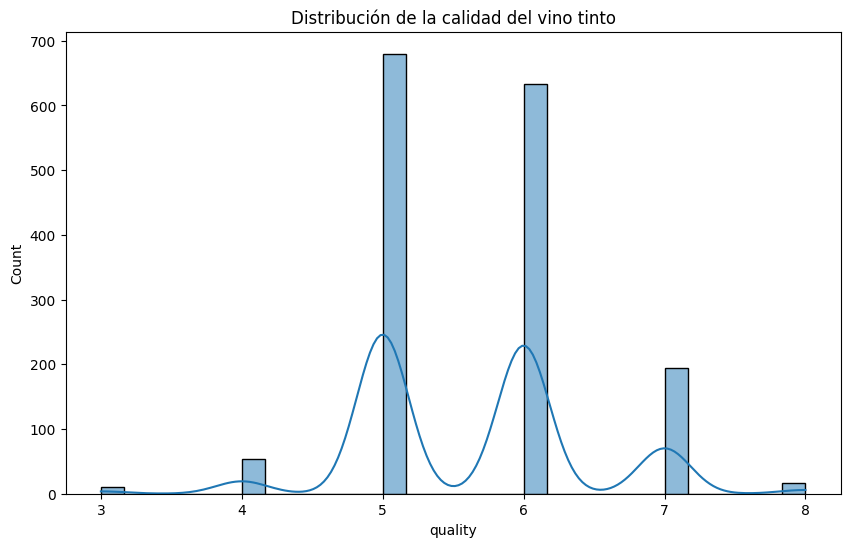

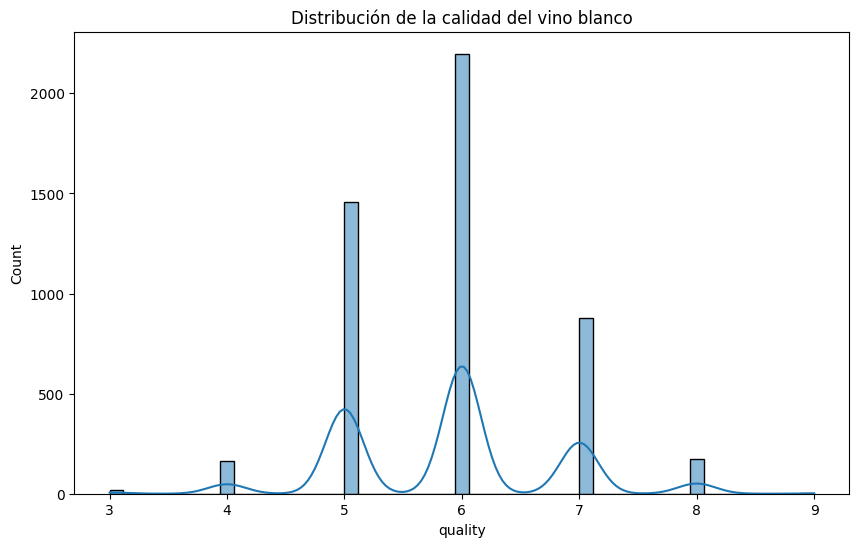

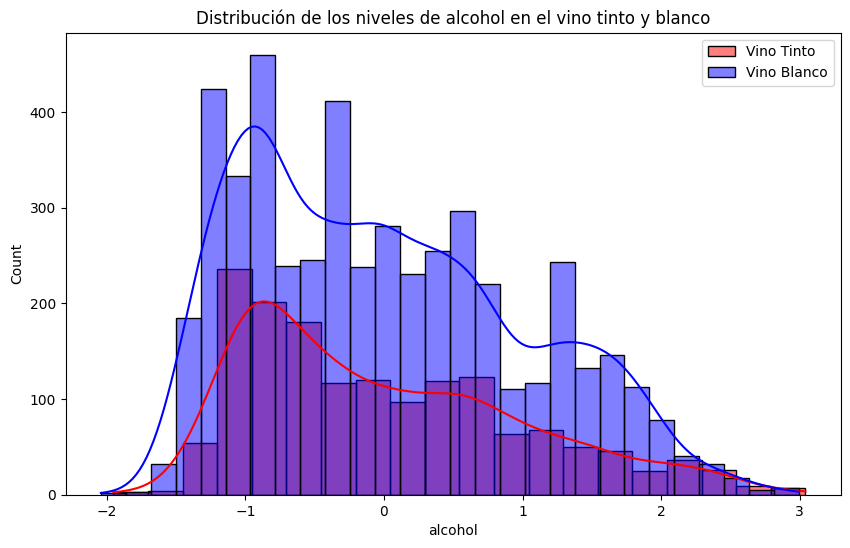

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de la calidad del vino tinto
plt.figure(figsize=(10, 6))
sns.histplot(df_red['quality'], kde=True)
plt.title("Distribución de la calidad del vino tinto")
plt.show()

# Distribución de la calidad del vino blanco
plt.figure(figsize=(10, 6))
sns.histplot(df_white['quality'], kde=True)
plt.title("Distribución de la calidad del vino blanco")
plt.show()

# Distribución de algunas variables clave
plt.figure(figsize=(10, 6))
sns.histplot(df_red['alcohol'], kde=True, color='red', label='Vino Tinto')
sns.histplot(df_white['alcohol'], kde=True, color='blue', label='Vino Blanco')
plt.title("Distribución de los niveles de alcohol en el vino tinto y blanco")
plt.legend()
plt.show()


## 4. Correlaciones entre las Variables

- **Heatmap de correlaciones**: Muestra un mapa de calor con las correlaciones entre las variables para ambos datasets.
- **Interpretación**: Asegúrate de comentar cuáles son las variables más correlacionadas con la calidad.

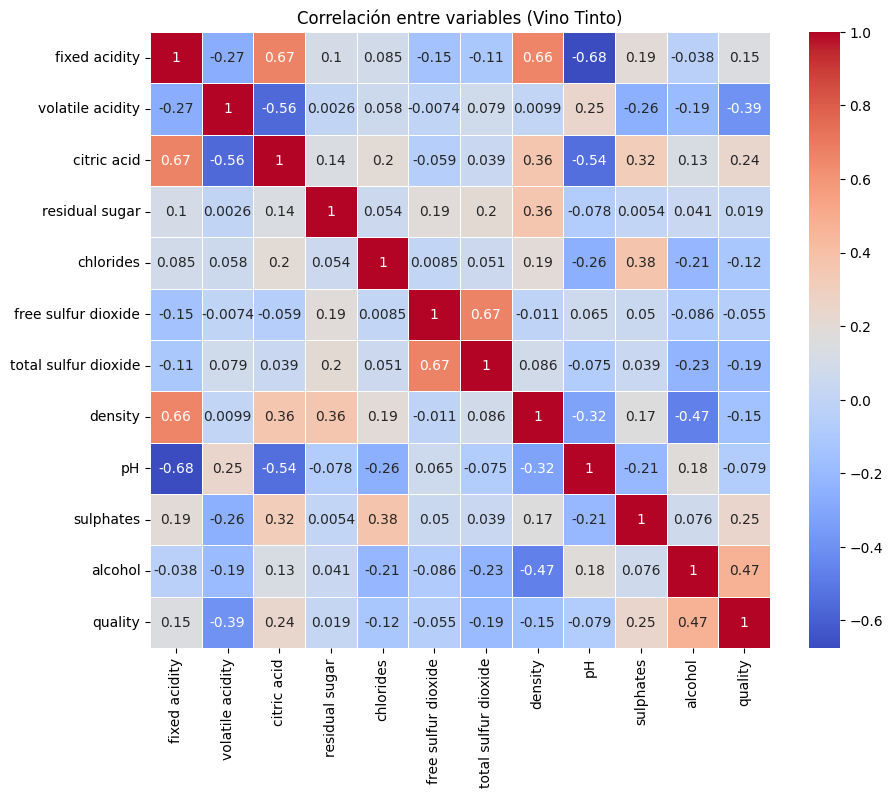

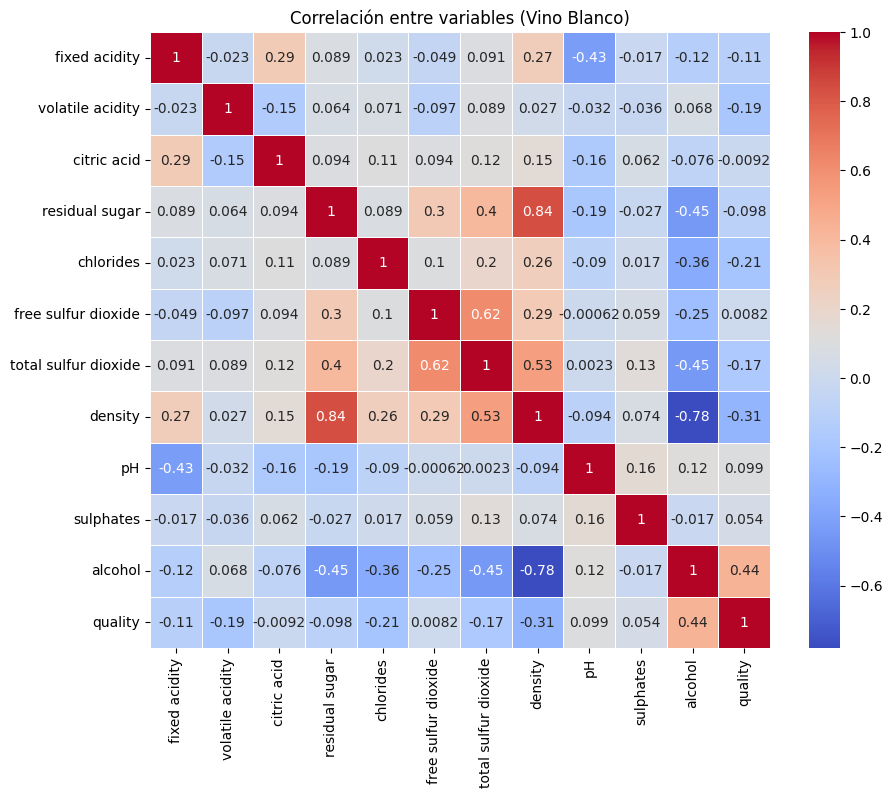

In [37]:
# Mapa de calor para vino tinto
plt.figure(figsize=(10, 8))
sns.heatmap(df_red.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlación entre variables (Vino Tinto)")
plt.show()

# Mapa de calor para vino blanco
plt.figure(figsize=(10, 8))
sns.heatmap(df_white.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlación entre variables (Vino Blanco)")
plt.show()


## Correlaciones entre las variables

El análisis de correlación muestra que algunas variables como el nivel de alcohol tienen una correlación positiva con la calidad del vino. Por otro lado, variables como la acidez volátil muestran correlaciones negativas con la calidad. Estas observaciones son importantes para el posterior modelado, ya que nos ayudan a identificar qué características son más influyentes en la predicción de la calidad.


## 5. Análisis de Relaciones entre Variables

- **Pairplot**: Crea gráficos pairplot para observar las relaciones entre las principales variables y la calidad.
- **Boxplots**: Puedes incluir boxplots para observar la relación entre la calidad y algunas de las variables como el pH, alcohol, etc.

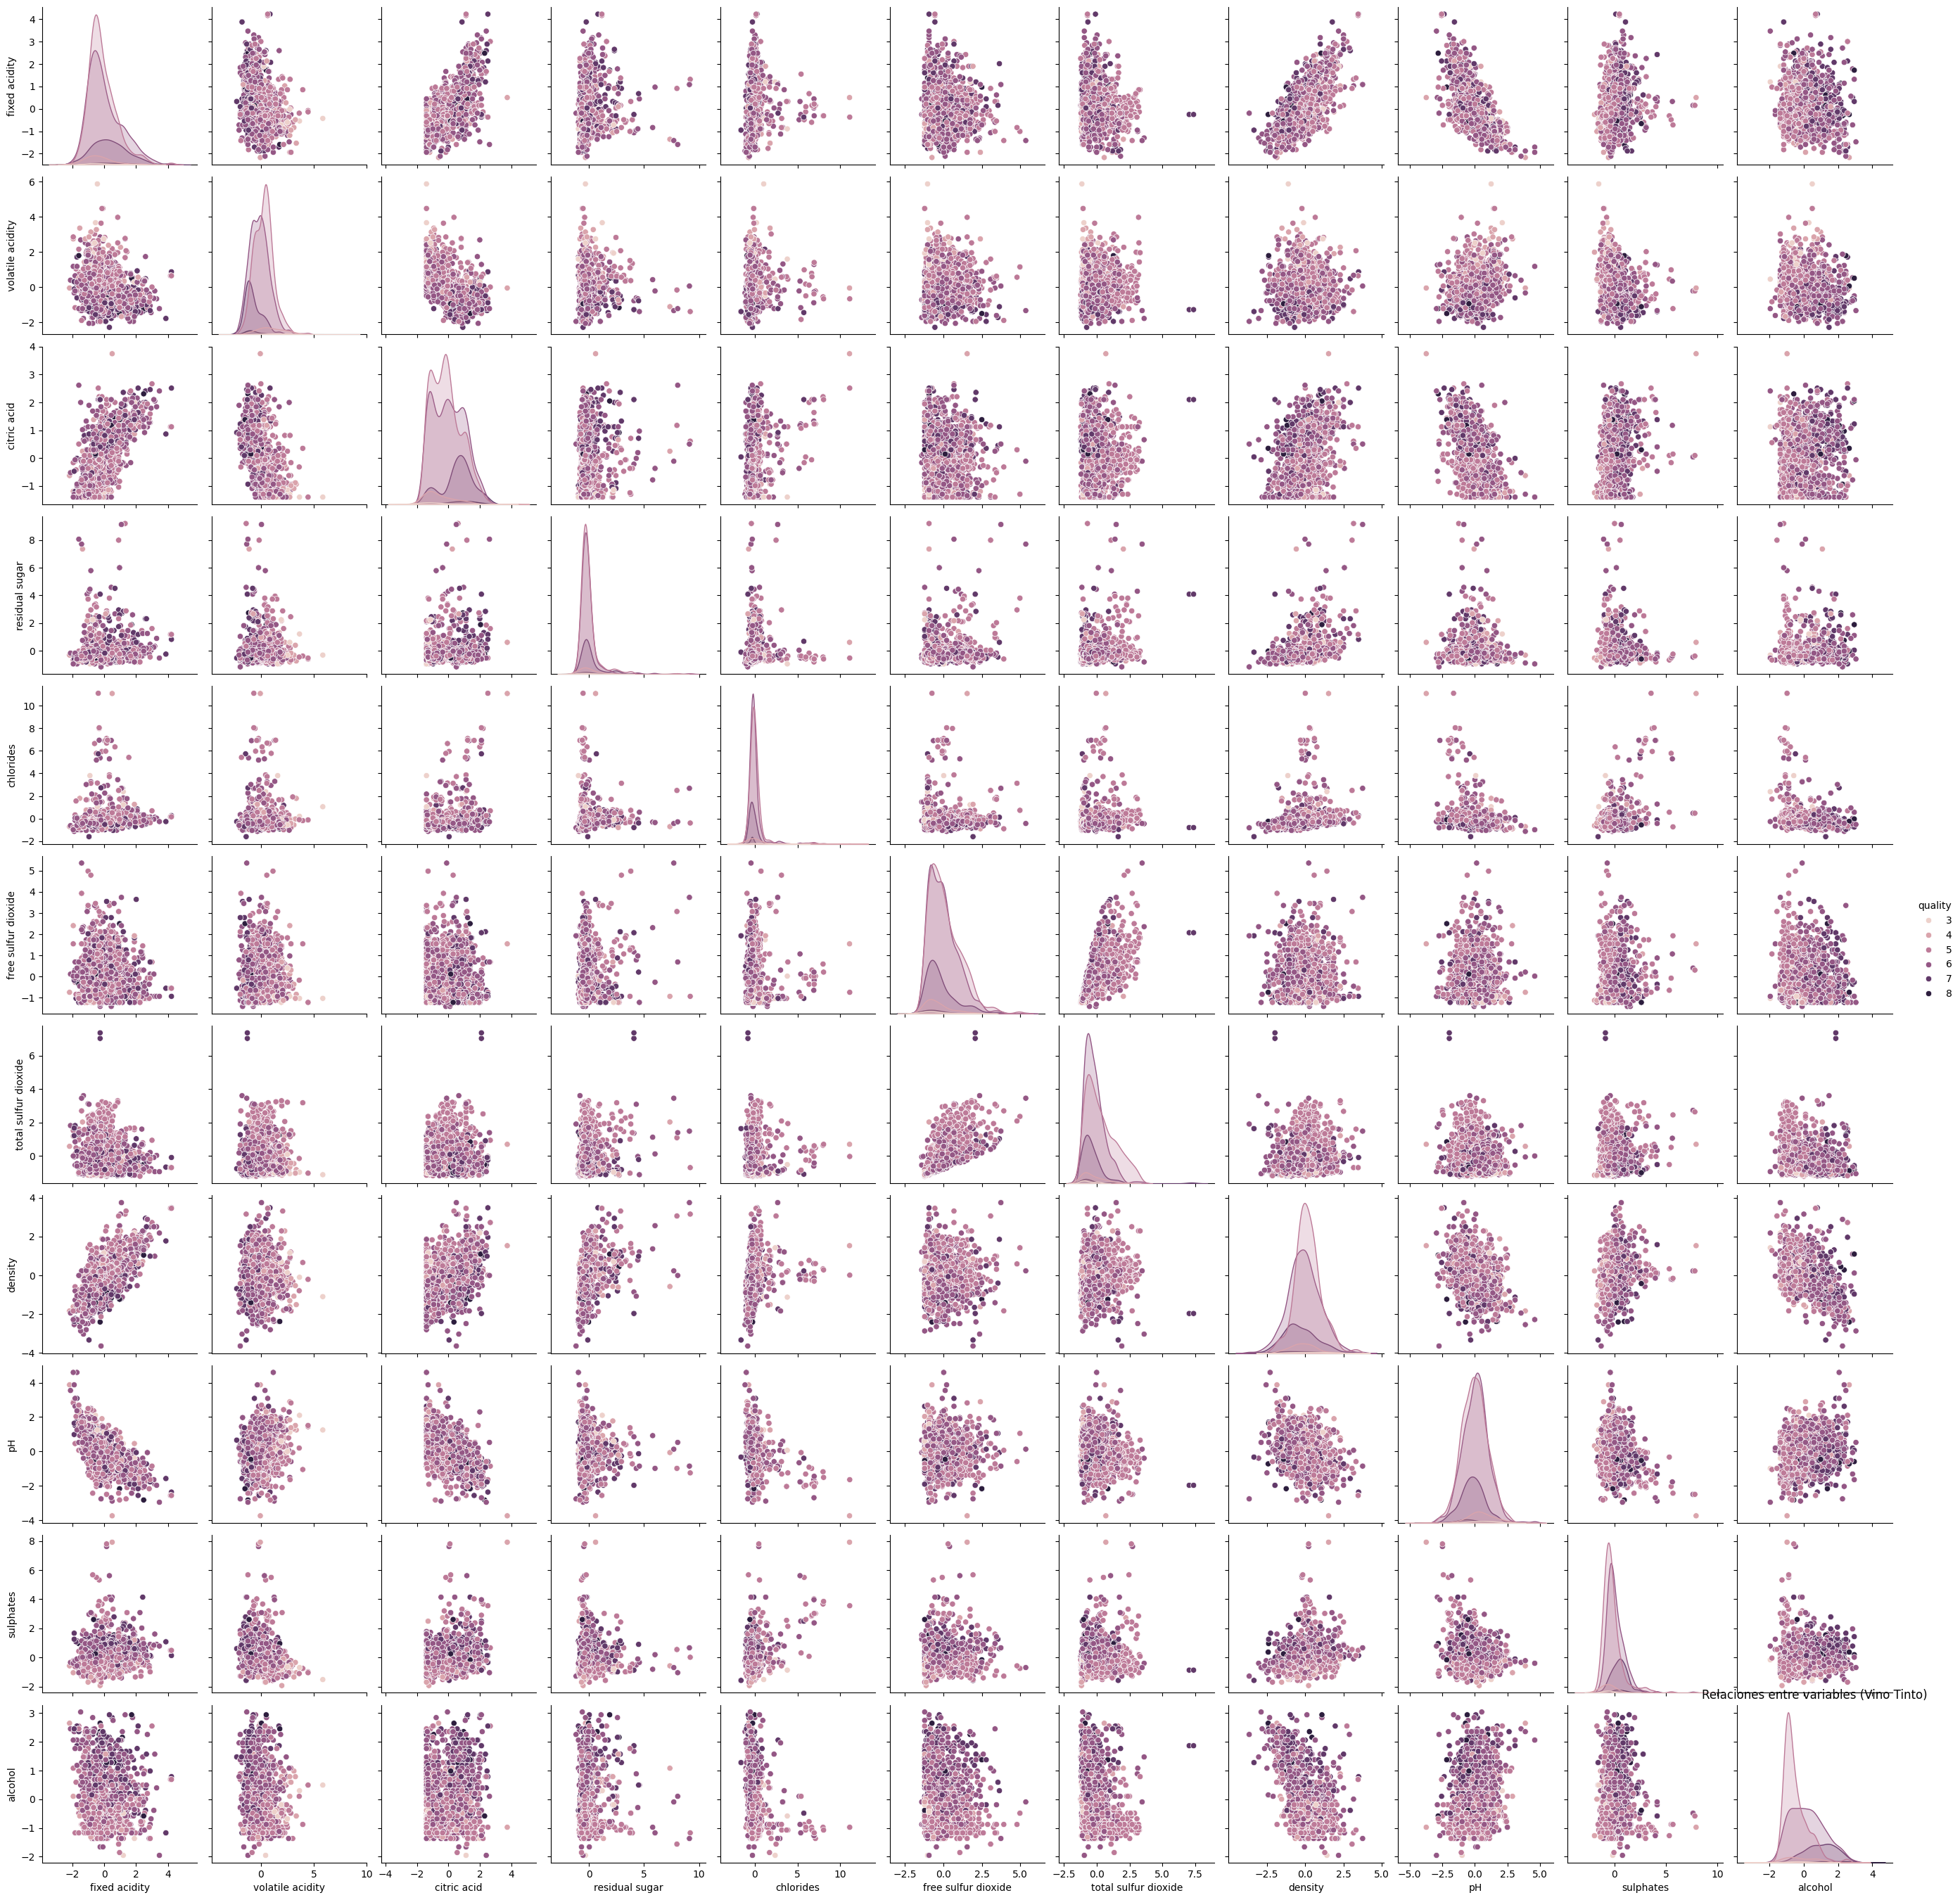

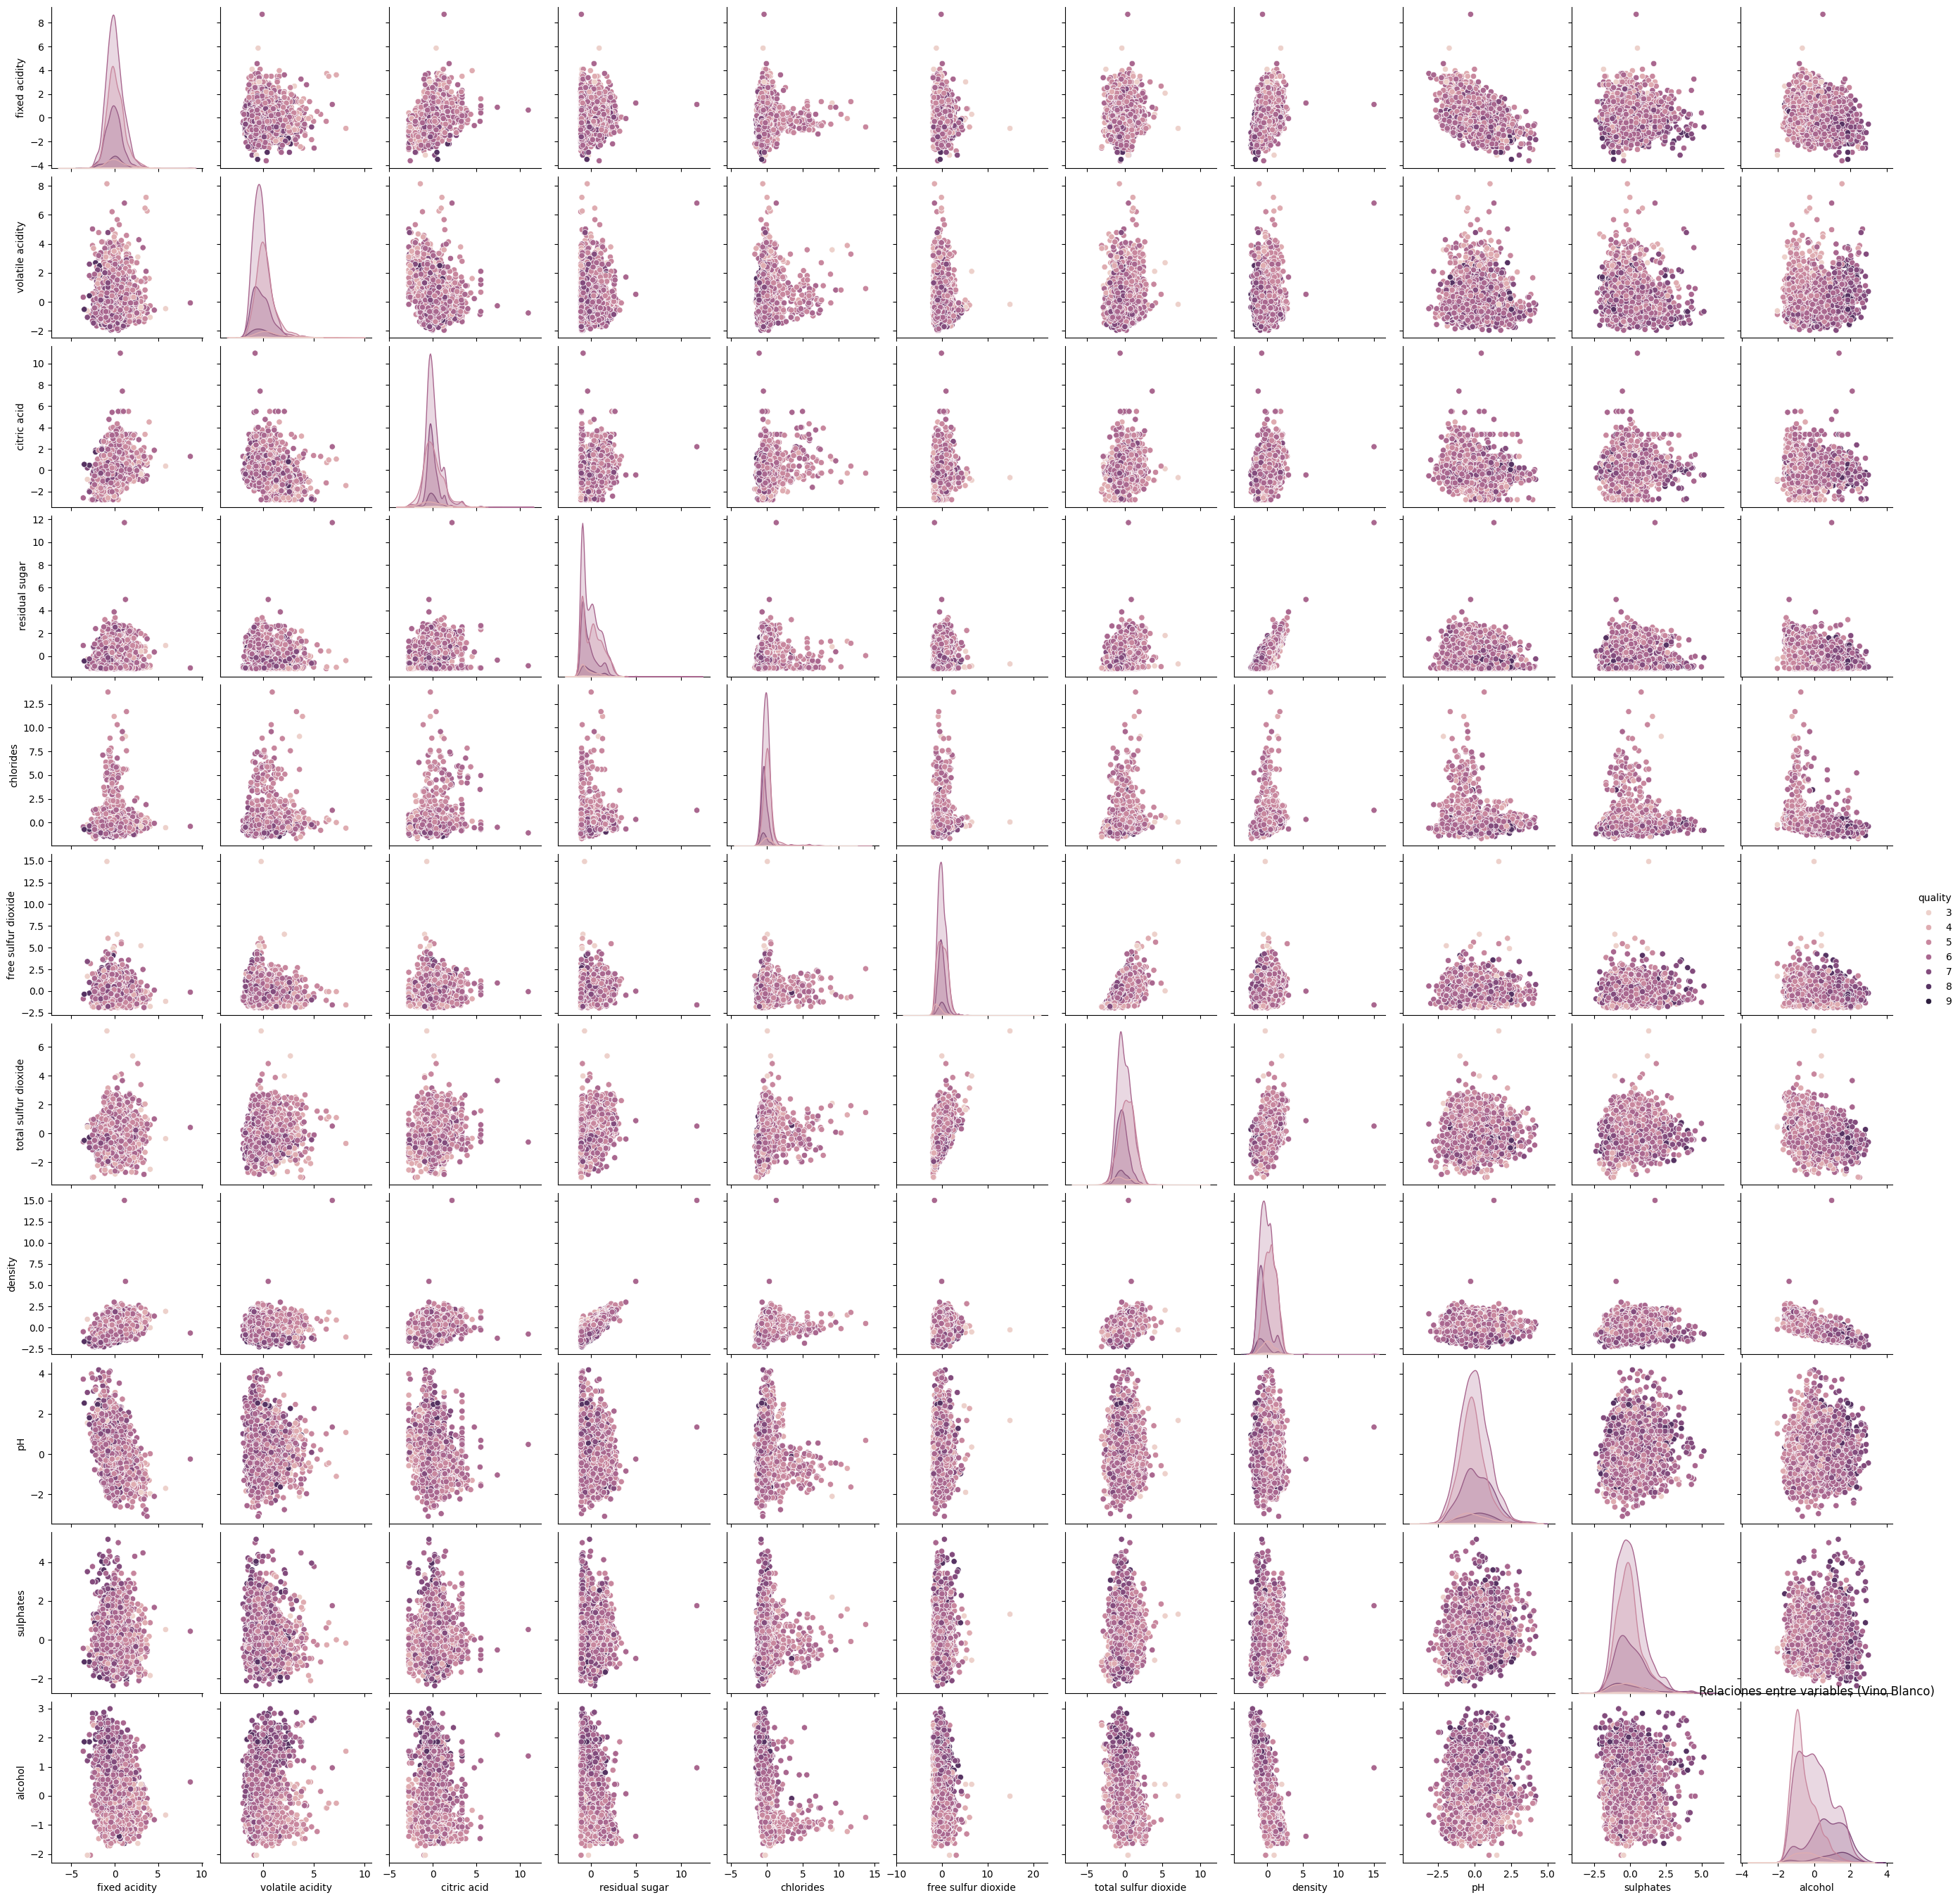

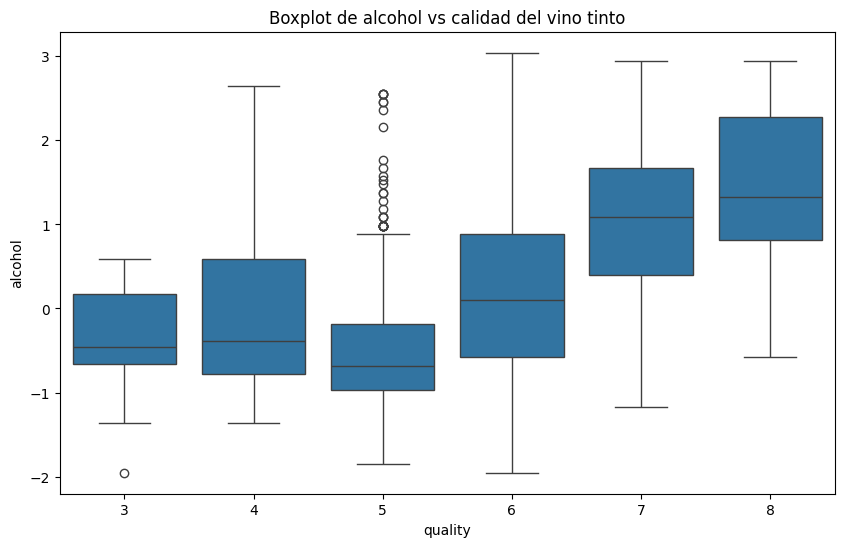

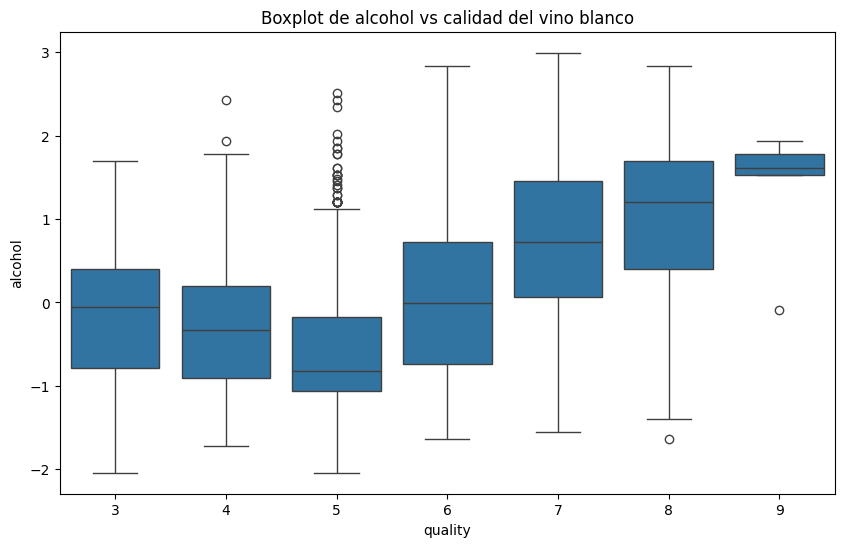

In [38]:
# Pairplot para vino tinto
sns.pairplot(df_red, hue="quality", diag_kind="kde")
plt.title("Relaciones entre variables (Vino Tinto)")
plt.show()

# Pairplot para vino blanco
sns.pairplot(df_white, hue="quality", diag_kind="kde")
plt.title("Relaciones entre variables (Vino Blanco)")
plt.show()

# Boxplot para la variable alcohol
plt.figure(figsize=(10, 6))
sns.boxplot(x="quality", y="alcohol", data=df_red)
plt.title("Boxplot de alcohol vs calidad del vino tinto")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="quality", y="alcohol", data=df_white)
plt.title("Boxplot de alcohol vs calidad del vino blanco")
plt.show()


## 6. Limpieza de Datos 

Si los datos ya han sido limpiados en un script aparte (`data_cleaning.py`), puedes omitir este paso aquí. Sin embargo, si decides realizar la limpieza en el notebook, asegúrate de:

- **Eliminar o imputar valores nulos**.
- **Tratar outliers si es necesario**.

In [39]:
# Revisar valores nulos
print("Valores nulos en el dataset de vino tinto:")
print(df_red.isnull().sum())

print("Valores nulos en el dataset de vino blanco:")
print(df_white.isnull().sum())

# Eliminar valores nulos (si es necesario)
df_red_clean = df_red.dropna()
df_white_clean = df_white.dropna()

# Guardar los datos limpios (si se realiza limpieza en el notebook)
df_red_clean.to_csv(r'C:\Users\BS\Downloads\wine_quality\data\processed\winequality-red-clean.csv', index=False)
df_white_clean.to_csv(r'C:\Users\BS\Downloads\wine_quality\data\processed\winequality-white-clean.csv', index=False)


Valores nulos en el dataset de vino tinto:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Valores nulos en el dataset de vino blanco:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## Conclusiones del Análisis Exploratorio de Datos

Después de realizar un análisis exhaustivo de los datos de calidad del vino tinto y blanco, hemos obtenido varias observaciones clave:

1. **Distribución de la Calidad**:
   - La mayoría de los vinos tinto y blanco están clasificados con una calidad media, entre 5 y 6. En el caso del vino tinto, los valores extremos son más raros, con pocas observaciones en las categorías de calidad baja (3 y 4) o alta (7 y 8). Para el vino blanco, hay más vinos con calidad en el rango de 6 y 7, pero las observaciones con calidad superior a 8 son muy escasas.

2. **Variables Clave**:
   - El nivel de **alcohol** muestra una relación positiva con la calidad, especialmente en el caso del vino blanco. Esto sugiere que los vinos con mayor contenido alcohólico tienden a tener una mejor valoración de calidad.
   - La **acidez volátil** tiene una correlación negativa con la calidad, lo que significa que niveles más altos de acidez volátil pueden impactar negativamente la percepción de la calidad del vino.

3. **Correlaciones Notables**:
   - En ambos tipos de vino, observamos correlaciones importantes entre algunas variables químicas. En el vino tinto, la **acidez fija** y la **acidez cítrica** están fuertemente correlacionadas entre sí, lo cual puede indicar que estas características tienen una relación directa en el proceso de fermentación.
   - Para el vino blanco, la relación entre la **densidad** y el **azúcar residual** es notablemente fuerte, lo que sugiere que vinos con más azúcar residual tienden a ser más densos, un factor que puede influir en su calidad percibida.

4. **Conclusión General**:
   - El análisis exploratorio de los datos nos permite entender las características que más influyen en la calidad del vino. Las relaciones entre las variables, como la acidez, el alcohol y los sulfitos, ofrecen una visión clara de los factores que deben tenerse en cuenta para mejorar la calidad del producto final.
   - Estos resultados servirán de base para el siguiente paso del proyecto, en el que aplicaremos modelos de aprendizaje supervisado y no supervisado para predecir la calidad del vino basado en sus características químicas.

